In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\thead\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [754]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Read the CSV and Perform Basic Data Cleaning

In [899]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [900]:
# Set features. This will also be used as your x values.
df.columns
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]
selected_features = df[df.columns]
selected_features = selected_features.drop(columns = 'koi_disposition')

In [901]:

#drop least important columns from df. least_important is defined below based on the 3 classes results.
#selected_features  = selected_features.drop(columns = least_important_list)
X = selected_features
y = df['koi_disposition'].to_numpy()
#y = df['koi_disposition'].values.reshape(-1, 1)
y

array(['CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', ..., 'CANDIDATE',
       'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

In [758]:
selected_features

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [759]:
columns = selected_features.columns.to_list()

In [760]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [882]:
label_encoder.fit(y).transform(y)

array([1, 2, 2, ..., 0, 2, 2])

In [761]:
 for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CO

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
En

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1


Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Ori

Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITI

Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRM

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original

Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class

Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original

Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label

------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE

------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded La

Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------

Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------

Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FAL

Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded 

In [762]:
encoded_y

array([1, 2, 2, ..., 0, 2, 2])

In [763]:
encoded_y = encoded_y.reshape(-1,1)

In [764]:
#from keras.utils import to_categorical
#one_hot_y = to_categorical(encoded_y)
#one_hot_y

In [765]:
print(X.shape, y.shape)

(6991, 40) (6991,)


In [766]:
encoded_y.shape

(6991, 1)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [767]:
from sklearn.model_selection import train_test_split

X_train, X_test, encoded_y_train, encoded_y_test = train_test_split(X, encoded_y, random_state=1)

In [768]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,5.470000e-05,-5.470000e-05,139.064020,0.004110,-0.004110,...,-133,4.387,0.066,-0.123,1.092,0.181,-0.097,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,1.365000e-04,-1.365000e-04,140.207320,0.004460,-0.004460,...,-144,4.519,0.078,-0.052,0.804,0.056,-0.076,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,1.230000e-07,-1.230000e-07,131.792007,0.000096,-0.000096,...,-140,4.594,0.054,-0.027,0.683,0.054,-0.060,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,1.461000e-03,-1.461000e-03,187.569860,0.005290,-0.005290,...,-112,4.447,0.072,-0.108,0.954,0.135,-0.083,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,3.181000e-03,-3.181000e-03,175.715600,0.028600,-0.028600,...,-233,4.145,0.164,-0.164,1.608,0.905,-0.383,294.93198,39.812420,12.964


In [769]:
print(X_train.shape, encoded_y_train.shape)

(5243, 40) (5243, 1)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [770]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(encoded_y_train)


In [771]:
X_scaled_train = X_scaler.transform(X_train)
X_scaled_test = X_scaler.transform(X_test)
#y_scaled_train = y_scaler.transform(encoded_y_train)
#y_scaled_test = y_scaler.transform(encoded_y_test)

In [772]:
X_scaled_train

array([[0.        , 0.        , 0.        , ..., 0.83497297, 0.51779124,
        0.5155798 ],
       [0.        , 0.        , 0.        , ..., 0.72693168, 0.38067188,
        0.70650467],
       [0.        , 0.        , 0.        , ..., 0.56436342, 0.80798012,
        0.69823952],
       ...,
       [0.        , 0.        , 1.        , ..., 0.88419373, 0.2724652 ,
        0.74055707],
       [0.        , 0.        , 0.        , ..., 0.38035748, 0.58629009,
        0.733697  ],
       [0.        , 0.        , 0.        , ..., 0.25722845, 0.72706515,
        0.59980164]])

In [773]:
encoded_y_train.ravel()

array([0, 1, 0, ..., 2, 1, 1])

In [774]:
print(X_scaled_train.shape, y_scaled_train.shape)

(5243, 40) (5243,)


# Train the Model



In [903]:
encoded_y_train = encoded_y_train.ravel()
encoded_y_train

array([0, 1, 0, ..., 2, 1, 1])

In [837]:
# random forest generator classifier
from sklearn.ensemble import RandomForestClassifier

In [838]:
rf = RandomForestClassifier()
rf = rf.fit(X_scaled_train, encoded_y_train)
rf.score(X_scaled_test, encoded_y_test)

0.9050343249427918

In [839]:
print(f"Training Data Score: {rf.score(X_scaled_train, encoded_y_train)}")
print(f"Testing Data Score: {rf.score(X_scaled_test, encoded_y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9050343249427918


In [840]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.09513838, 0.06361318, 0.10569212, 0.04103414, 0.01952308,
       0.01787544, 0.01994453, 0.01425541, 0.02478626, 0.02249224,
       0.0195059 , 0.01080504, 0.01047588, 0.02299485, 0.03092791,
       0.03272674, 0.02056354, 0.01133701, 0.01725115, 0.0401514 ,
       0.03327292, 0.04650219, 0.01651472, 0.01202082, 0.01808388,
       0.01311631, 0.05726113, 0.00352731, 0.00878797, 0.02872063,
       0.02698916, 0.00944956, 0.00883477, 0.01061003, 0.00959758,
       0.01102608, 0.008786  , 0.01276919, 0.0122001 , 0.01083543])

In [841]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, columns), reverse=True)

[(0.10569212253652721, 'koi_fpflag_co'),
 (0.09513838294656538, 'koi_fpflag_nt'),
 (0.06361318085353443, 'koi_fpflag_ss'),
 (0.05726112613049386, 'koi_model_snr'),
 (0.04650218884935468, 'koi_prad_err2'),
 (0.041034138928756604, 'koi_fpflag_ec'),
 (0.04015140102058954, 'koi_prad'),
 (0.033272923935017316, 'koi_prad_err1'),
 (0.03272674324258347, 'koi_duration_err2'),
 (0.030927911822620457, 'koi_duration_err1'),
 (0.02872063156915199, 'koi_steff_err1'),
 (0.026989159158471443, 'koi_steff_err2'),
 (0.02478626445179797, 'koi_time0bk_err1'),
 (0.0229948456243731, 'koi_duration'),
 (0.022492238082175528, 'koi_time0bk_err2'),
 (0.02056354449992959, 'koi_depth'),
 (0.019944532999711856, 'koi_period_err2'),
 (0.019523082724065426, 'koi_period'),
 (0.01950590137384035, 'koi_impact'),
 (0.01808388192489684, 'koi_insol_err1'),
 (0.017875437145170335, 'koi_period_err1'),
 (0.01725115109541394, 'koi_depth_err2'),
 (0.016514715190305316, 'koi_teq'),
 (0.014255412472117542, 'koi_time0bk'),
 (0.01311

In [886]:
#Creating the dependent variable class
factor = pd.factorize(y)
df.koi_disposition = factor[0]
definitions = factor[1]
print(df.koi_disposition.head())
print(definitions)

0    0
1    1
2    1
3    0
4    0
Name: koi_disposition, dtype: int64
['CONFIRMED' 'FALSE POSITIVE' 'CANDIDATE']


In [895]:
# Predicting the Test set results
y_pred = rf.predict(X_scaled_test)

#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(encoded_y_test).ravel()

y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual result'], colnames=['Predicted result']))

Predicted result  CANDIDATE  CONFIRMED  FALSE POSITIVE
Actual result                                         
CANDIDATE               905          1               3
CONFIRMED                10        310              84
FALSE POSITIVE            4         64             367


In [902]:
df.groupby(by = 'koi_disposition').count()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_disposition,,,,,,,,,,,,,,,,,,,,,
CANDIDATE,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687,...,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687
CONFIRMED,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,...,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800
FALSE POSITIVE,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,...,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504


In [849]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [850]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose = 2, random_state=42, n_jobs = -1)

In [851]:
rf_random.fit(X_scaled_train, encoded_y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   50.3s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [852]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [873]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [874]:
rf_random.score(X_scaled_test, encoded_y_test)

0.9130434782608695

In [878]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print('predictions',predictions)
    print('len(predictions)', len(predictions))
    print('test labelsz', test_labels.ravel())
    print('len(test_labels)', len(test_labels.ravel()))
    errors = abs(predictions - test_labels.ravel())
    print('errors',errors)
    print(errors.sum())
    mape = 100 * np.mean(errors / test_labels.ravel())
    print('error', errors / test_labels.ravel())
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_scaled_train, encoded_y_train.ravel())
base_accuracy = evaluate(base_model, X_scaled_test, encoded_y_test.ravel())
print("base accuracy",base_accuracy)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_scaled_test, encoded_y_test.ravel())
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

predictions [1 2 2 ... 2 2 0]
len(predictions) 1748
test labelsz [1 2 2 ... 2 2 0]
len(test_labels) 1748
errors [0 0 0 ... 0 0 0]
204
error [ 0.  0.  0. ...  0.  0. nan]
Model Performance
Average Error: 0.1167 degrees.
Accuracy = nan%.
base accuracy nan


C:\Users\thead\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\thead\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\thead\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\thead\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


predictions [1 2 2 ... 2 2 0]
len(predictions) 1748
test labelsz [1 2 2 ... 2 2 0]
len(test_labels) 1748
errors [0 0 0 ... 0 0 0]
155
error [ 0.  0.  0. ...  0.  0. nan]
Model Performance
Average Error: 0.0887 degrees.
Accuracy = nan%.
Improvement of nan%.


C:\Users\thead\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\thead\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\thead\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\thead\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [813]:
# Train the model with GridSearch
grid.fit(X_scaled_train, encoded_y_train.ravel())

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


ValueError: Invalid parameter C for estimator RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=4, oob_score=False, random_state=None, verbose=3,
                       warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [810]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'C': 1040, 'gamma': 'auto'}
0.8846054766808085
20


In [685]:
def plot_coefficients(classifier, feature_names, top_features=15, class_num =1):

    coef = classifier.coef_[class_num].ravel()
    print("classifier.coef type",type(classifier.coef_))
    print("classifier.coef", classifier.coef_)
    print("type coef",type(coef))
    print("len(coeff)", len(coef))
    print("coef",coef)
    print("argsrt(coeff)",np.argsort(coef))
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    print(len(top_positive_coefficients))
    print(type(top_positive_coefficients))
    print(top_positive_coefficients)
    top_negative_coefficients = np.argsort(coef)[:top_features]
    print(top_negative_coefficients)
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    print(top_coefficients)
    print(np.array(feature_names))
    #print(np.array(feature_names)[top_coefficients])
    #x_labels = np.array(feature_names)[top_coefficients]
    
 # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    print("coef[top_coefficients]",coef[top_coefficients])
    #print(feature_names[top_coefficients])
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    print("feature names",feature_names)
    print("top coefficients", top_coefficients)
    print("feature_name_top", feature_names[top_coefficients])
    features = feature_names[top_coefficients]
    plt.xticks(np.arange(1, 1 + 2 * top_features), features, rotation=60, ha='right')
    plt.show()

In [686]:
df_coef_1 = model.coef_[0]

In [687]:
cv = CountVectorizer()
cv.fit(selected_features)
print (len(cv.vocabulary_))
print(len(cv.get_feature_names()))
print (cv.get_feature_names())

17
17
['koi_depth', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_impact', 'koi_impact_err2', 'koi_period', 'koi_period_err1', 'koi_steff_err1', 'koi_steff_err2', 'koi_teq', 'koi_time0bk_err1', 'koi_time0bk_err2']


classifier.coef type <class 'numpy.ndarray'>
classifier.coef [[-1.52757132e+00  5.89022616e-01 -1.28034188e+00  0.00000000e+00
   4.18888246e+00  1.86487648e+00  7.49292539e+00 -7.49292539e+00
   7.05087414e-01 -3.76114056e-01 -4.97487941e+00  7.84288342e+00
  -7.84288342e+00  7.61573917e-01  4.44766324e+00  6.55022939e+00
  -4.55479296e+00]
 [-1.99988814e+00 -1.99997563e+00 -2.00027748e+00 -2.00014980e+00
   3.47191747e-04  8.79481612e-05  8.87798231e-06 -8.87798230e-06
  -6.31465208e-03 -4.47567723e-03 -6.76453623e-05 -2.05019787e-04
   2.05019787e-04  9.12145001e-05  4.30498726e-04 -6.29964898e-04
  -8.19710217e-04]
 [-2.00006363e+00 -2.00006233e+00 -2.00026860e+00 -2.00021199e+00
   8.80943027e-04 -1.90227205e-02  1.50500119e-04 -1.50500119e-04
  -1.67691225e-02 -2.89684551e-03  6.85071705e-06 -8.07931995e-04
   8.07931995e-04 -1.37778115e-02 -6.00661600e-04  1.46045803e-04
   1.36718819e-04]]
type coef <class 'numpy.ndarray'>
len(coeff) 17
coef [-1.52757132  0.58902262 -1.28034188

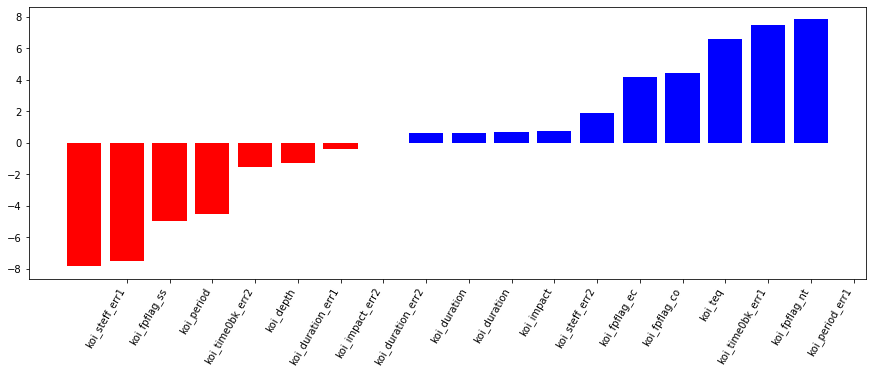

In [711]:
plot_coefficients(model, cv.get_feature_names(), 9,0)

classifier.coef type <class 'numpy.ndarray'>
classifier.coef [[-1.52757132e+00  5.89022616e-01 -1.28034188e+00  0.00000000e+00
   4.18888246e+00  1.86487648e+00  7.49292539e+00 -7.49292539e+00
   7.05087414e-01 -3.76114056e-01 -4.97487941e+00  7.84288342e+00
  -7.84288342e+00  7.61573917e-01  4.44766324e+00  6.55022939e+00
  -4.55479296e+00]
 [-1.99988814e+00 -1.99997563e+00 -2.00027748e+00 -2.00014980e+00
   3.47191747e-04  8.79481612e-05  8.87798231e-06 -8.87798230e-06
  -6.31465208e-03 -4.47567723e-03 -6.76453623e-05 -2.05019787e-04
   2.05019787e-04  9.12145001e-05  4.30498726e-04 -6.29964898e-04
  -8.19710217e-04]
 [-2.00006363e+00 -2.00006233e+00 -2.00026860e+00 -2.00021199e+00
   8.80943027e-04 -1.90227205e-02  1.50500119e-04 -1.50500119e-04
  -1.67691225e-02 -2.89684551e-03  6.85071705e-06 -8.07931995e-04
   8.07931995e-04 -1.37778115e-02 -6.00661600e-04  1.46045803e-04
   1.36718819e-04]]
type coef <class 'numpy.ndarray'>
len(coeff) 17
coef [-1.99988814e+00 -1.99997563e+00 -2.

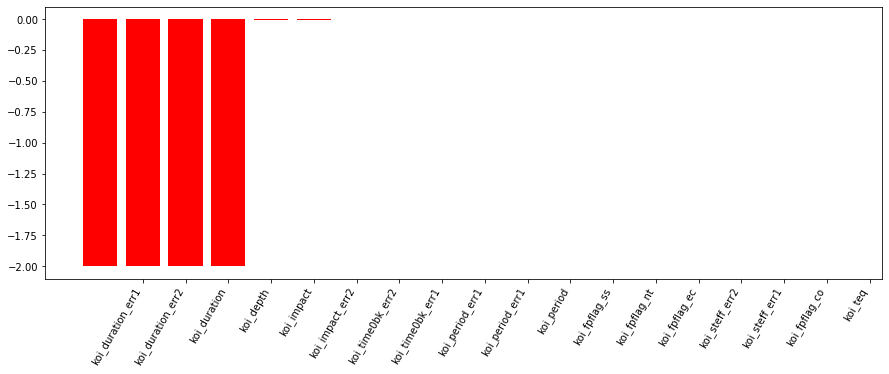

In [712]:
plot_coefficients(model, cv.get_feature_names(), 9, 1)

classifier.coef type <class 'numpy.ndarray'>
classifier.coef [[-1.52757132e+00  5.89022616e-01 -1.28034188e+00  0.00000000e+00
   4.18888246e+00  1.86487648e+00  7.49292539e+00 -7.49292539e+00
   7.05087414e-01 -3.76114056e-01 -4.97487941e+00  7.84288342e+00
  -7.84288342e+00  7.61573917e-01  4.44766324e+00  6.55022939e+00
  -4.55479296e+00]
 [-1.99988814e+00 -1.99997563e+00 -2.00027748e+00 -2.00014980e+00
   3.47191747e-04  8.79481612e-05  8.87798231e-06 -8.87798230e-06
  -6.31465208e-03 -4.47567723e-03 -6.76453623e-05 -2.05019787e-04
   2.05019787e-04  9.12145001e-05  4.30498726e-04 -6.29964898e-04
  -8.19710217e-04]
 [-2.00006363e+00 -2.00006233e+00 -2.00026860e+00 -2.00021199e+00
   8.80943027e-04 -1.90227205e-02  1.50500119e-04 -1.50500119e-04
  -1.67691225e-02 -2.89684551e-03  6.85071705e-06 -8.07931995e-04
   8.07931995e-04 -1.37778115e-02 -6.00661600e-04  1.46045803e-04
   1.36718819e-04]]
type coef <class 'numpy.ndarray'>
len(coeff) 17
coef [-2.00006363e+00 -2.00006233e+00 -2.

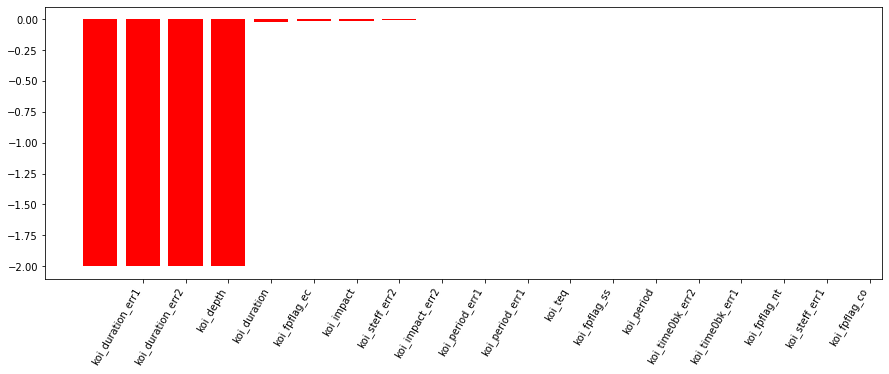

In [713]:
plot_coefficients(model, cv.get_feature_names(), 9, 2)

In [714]:
def f_importances(coef, names):
    imp = coef
    print(imp)
    print(names)
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [715]:
df_coef_0 = pd.DataFrame({'coef' : model.coef_[0],'abs(coef_)': abs(model.coef_[0]), 'name': columns})
df_coef_0=df_coef_0.sort_values('abs(coef_)', ascending = False)[-1:].reset_index()
df_coef_0

,index,coef,abs(coef_),name
0,3,0.0,0.0,koi_fpflag_ec


In [716]:
type(df_coef_0['name'])

pandas.core.series.Series

In [717]:
df_coef_1 = pd.DataFrame({'coef' : model.coef_[1],'abs(coef_)': abs(model.coef_[1]), 'name': columns})
df_coef_1=df_coef_1.sort_values('abs(coef_)', ascending = False)[-15:].reset_index()
df_coef_1

,index,coef,abs(coef_),name
0,1,-1.999976,1.999976,koi_fpflag_ss
1,0,-1.999888,1.999888,koi_fpflag_nt
2,8,-0.006315,0.006315,koi_impact
3,9,-0.004476,0.004476,koi_impact_err2
4,16,-0.000820,0.000820,koi_steff_err2
5,15,-0.000630,0.000630,koi_steff_err1
6,14,0.000430,0.000430,koi_teq
7,4,0.000347,0.000347,koi_period
8,11,-0.000205,0.000205,koi_duration_err1
9,12,0.000205,0.000205,koi_duration_err2


In [718]:
df_coef_2 = pd.DataFrame({'coef' : model.coef_[2],'abs(coef_)': abs(model.coef_[2]), 'name': columns})
df_coef_2=df_coef_2.sort_values('abs(coef_)', ascending = False)[-15:].reset_index()
df_coef_2

,index,coef,abs(coef_),name
0,0,-2.000064,2.000064,koi_fpflag_nt
1,1,-2.000062,2.000062,koi_fpflag_ss
2,5,-0.019023,0.019023,koi_period_err1
3,8,-0.016769,0.016769,koi_impact
4,13,-0.013778,0.013778,koi_depth
5,9,-0.002897,0.002897,koi_impact_err2
6,4,0.000881,0.000881,koi_period
7,12,0.000808,0.000808,koi_duration_err2
8,11,-0.000808,0.000808,koi_duration_err1
9,14,-0.000601,0.000601,koi_teq


In [719]:
#out of the bottom 20 coefficients in each of the 3 classes these below are the ones common to all three.
df_least_important = df_coef_0.merge(df_coef_1, on = 'name', how = 'inner').merge(df_coef_2, on = 'name', how = 'inner')

In [720]:
least_important_list = df_least_important['name'].to_list()
least_important_list

[]

[-1.52757132  0.58902262 -1.28034188  0.          4.18888246  1.86487648
  7.49292539 -7.49292539  0.70508741 -0.37611406 -4.97487941  7.84288342
 -7.84288342  0.76157392  4.44766324  6.55022939 -4.55479296]
['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_teq', 'koi_steff_err1', 'koi_steff_err2']


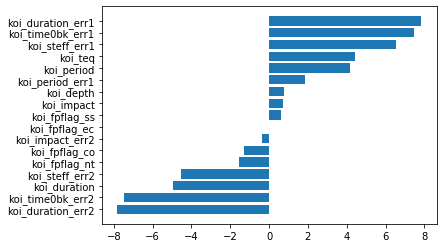

In [721]:
f_importances(model.coef_[0], columns)

In [722]:
len(columns)

17

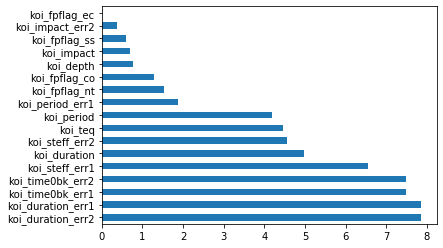

In [723]:
pd.Series(abs(model.coef_[0]), index=columns).nlargest(20).plot(kind='barh')

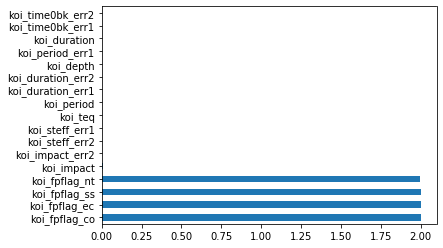

In [724]:
pd.Series(abs(model.coef_[1]), index=columns).nlargest(20).plot(kind='barh')

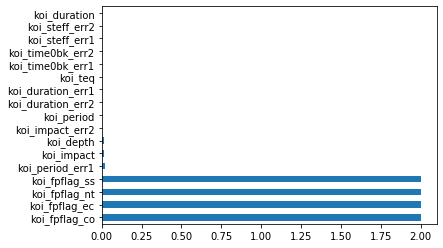

In [725]:
pd.Series(abs(model.coef_[2]), index=columns).nlargest(20).plot(kind='barh')

In [726]:
from sklearn.feature_selection import SelectFromModel
model1 = SelectFromModel(lsvc, prefit=True)
X_new = model1.transform(X)

In [727]:
X_new

array([[ 0.00e+00,  0.00e+00,  3.52e-03, ...,  1.16e-01, -1.16e-01,
         8.10e+01],
       [ 0.00e+00,  0.00e+00,  5.81e-04, ...,  3.41e-02, -3.41e-02,
         1.58e+02],
       [ 0.00e+00,  0.00e+00,  1.15e-04, ...,  5.37e-03, -5.37e-03,
         1.57e+02],
       ...,
       [ 0.00e+00,  0.00e+00,  7.69e-03, ...,  2.29e-01, -2.29e-01,
         1.65e+02],
       [ 0.00e+00,  1.00e+00,  2.85e-03, ...,  1.62e-01, -1.62e-01,
         1.93e+02],
       [ 0.00e+00,  1.00e+00,  1.08e-02, ...,  2.83e-01, -2.83e-01,
         1.58e+02]])

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [746]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [500,600, 700, 800 ,1000, 1100, 1200, 1300],
              'gamma': [1e-16, 1e-15,1e-14,1e-13]}
grid = GridSearchCV(model, param_grid, n_jobs = 10, verbose=3)

In [747]:
# Train the model with GridSearch
grid.fit(X_scaled_train, encoded_y_train.ravel())

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    2.9s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   19.8s
[Parallel(n_jobs=10)]: Done 160 out of 160 | elapsed:   30.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=10,
             param_grid={'C': [500, 600, 700, 800, 1000, 1100, 1200, 1300],
                         'gamma': [1e-16, 1e-15, 1e-14, 1e-13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [748]:
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=10,
             param_grid={'C': [500, 600, 700, 800, 1000, 1100, 1200, 1300],
                         'gamma': [1e-16, 1e-15, 1e-14, 1e-13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [749]:
sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_gamma',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [750]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'C': 1000, 'gamma': 1e-16}
0.8785024268842008
16


In [751]:
grid[1]

TypeError: 'GridSearchCV' object is not subscriptable

In [752]:
model.predict(X_scaled_test)

array([0, 2, 2, ..., 2, 2, 0])

In [753]:
encoded_y_test.ravel()

array([1, 2, 2, ..., 2, 2, 0])

In [736]:
df_results = pd.DataFrame({'col_1' : model.predict(X_scaled_test), 'col_2' : encoded_y_test.ravel()})
df_results

,col_1,col_2
0,0,1
1,2,2
2,2,2
3,1,1
4,2,2
...,...,...
1743,2,2
1744,1,1
1745,2,2
1746,2,2


In [ ]:
search.cv_results_['params']

In [738]:
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Save the Model

In [737]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'andrew_addie_svc.sav'
joblib.dump(model, filename)

['andrew_addie_svc.sav']

# Summary

The SVC model was run first with all the columns of data.  Then the columns were removed when in all 3 classes the coefficient for each column was <0.1.  This was done several times.  The best fit reduced very slightly but the number of columns was reduced significantly.
columns   best fit
40(all)   .884
    32   .881
    28   .882
    20   .878
    17   .878 *  Stopped.
At this point there were no columns that met the criteria of being in all 3 classes and having a coefficient of <0.1.

#the columns remaining are:

In [739]:
print (cv.get_feature_names())

['koi_depth', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_impact', 'koi_impact_err2', 'koi_period', 'koi_period_err1', 'koi_steff_err1', 'koi_steff_err2', 'koi_teq', 'koi_time0bk_err1', 'koi_time0bk_err2']


In [740]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'C': 1000, 'gamma': 1e-16}
0.8785024268842008
0
